In [1]:
# gradient will equal change per unit
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.signal as sg
import os, sys

%matplotlib inline
matplotlib.rcParams.update({'text.color': 'white'})

In [2]:
def showMe(*plots):
    plt.figure(figsize=(20,10))
    for p in plots:
        plt.plot(p)
    plt.show()

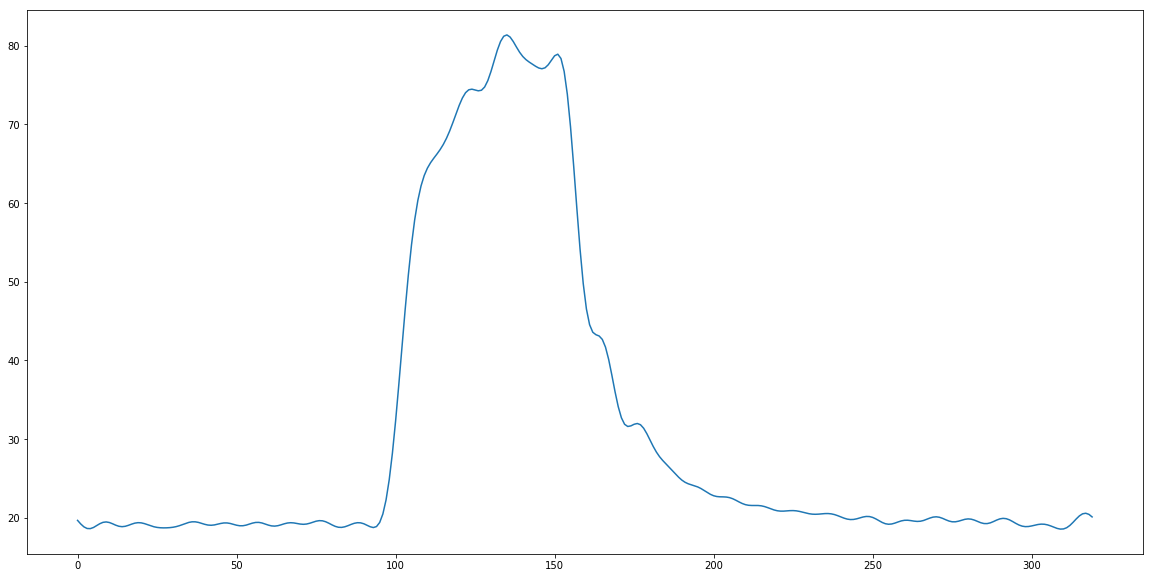

In [3]:
series = np.loadtxt("./contrasts/contrast_O2.txt", delimiter='\n')
showMe(series)

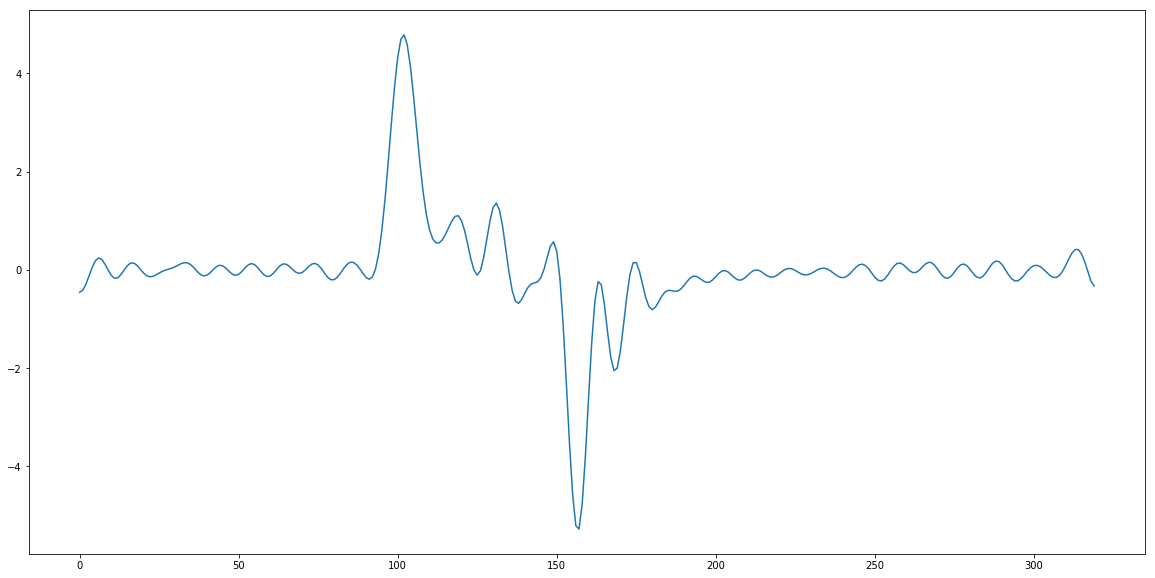

In [4]:
d_series = np.gradient(series)
showMe(d_series)

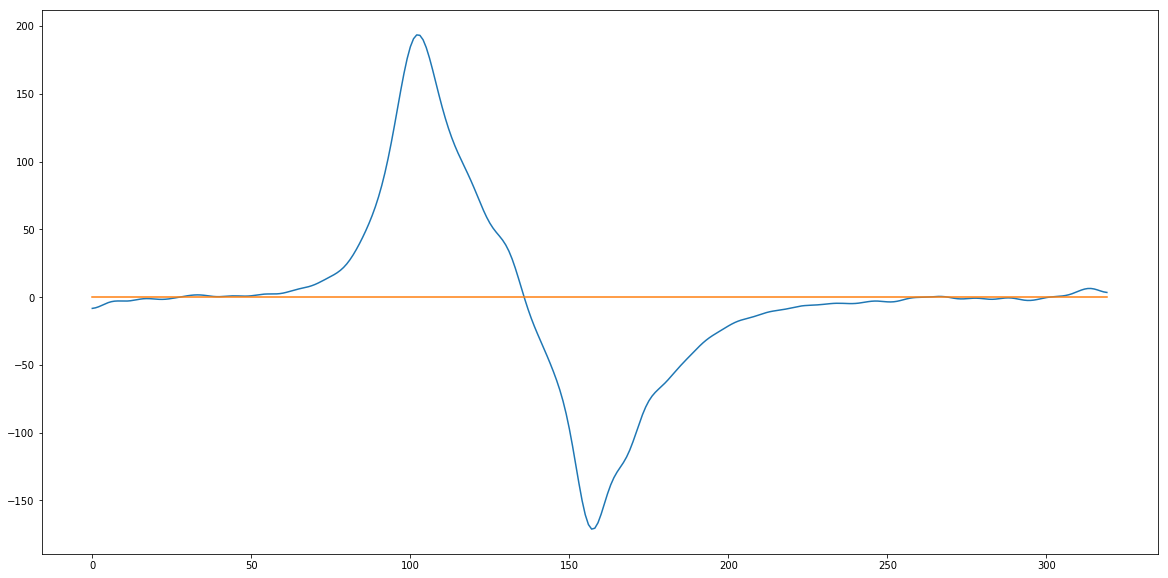

In [12]:
smooth_d_series = sg.symiirorder1(d_series, 1,.9)
showMe(smooth_d_series, np.linspace(0,0,num=320))
#max is our guess at the exponent's power (the exponent being e)

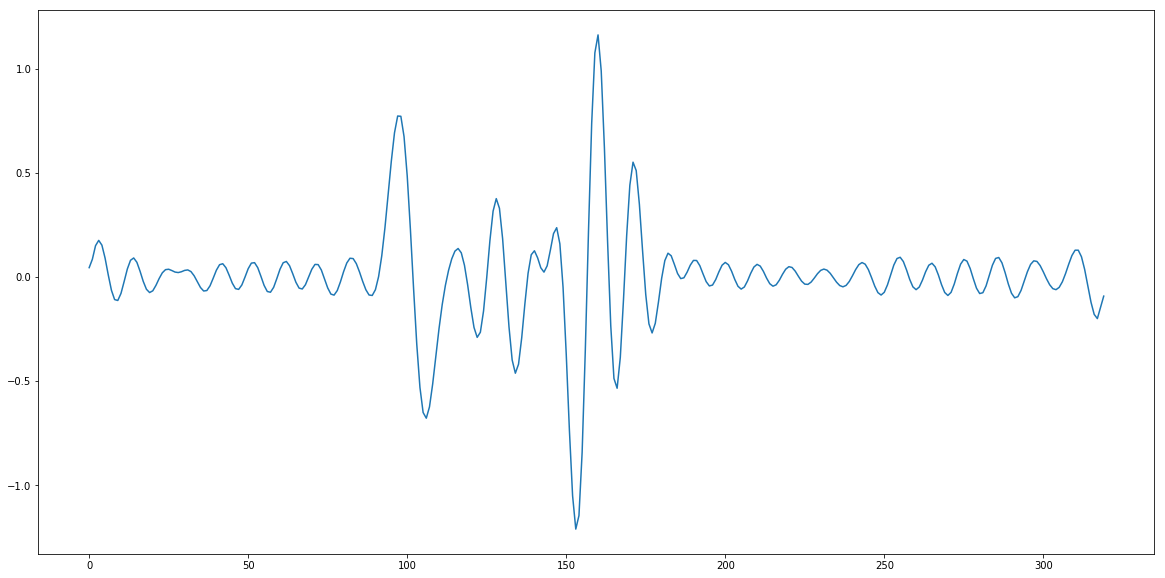

In [13]:
d2_series = np.gradient(d_series)
showMe(d2_series)

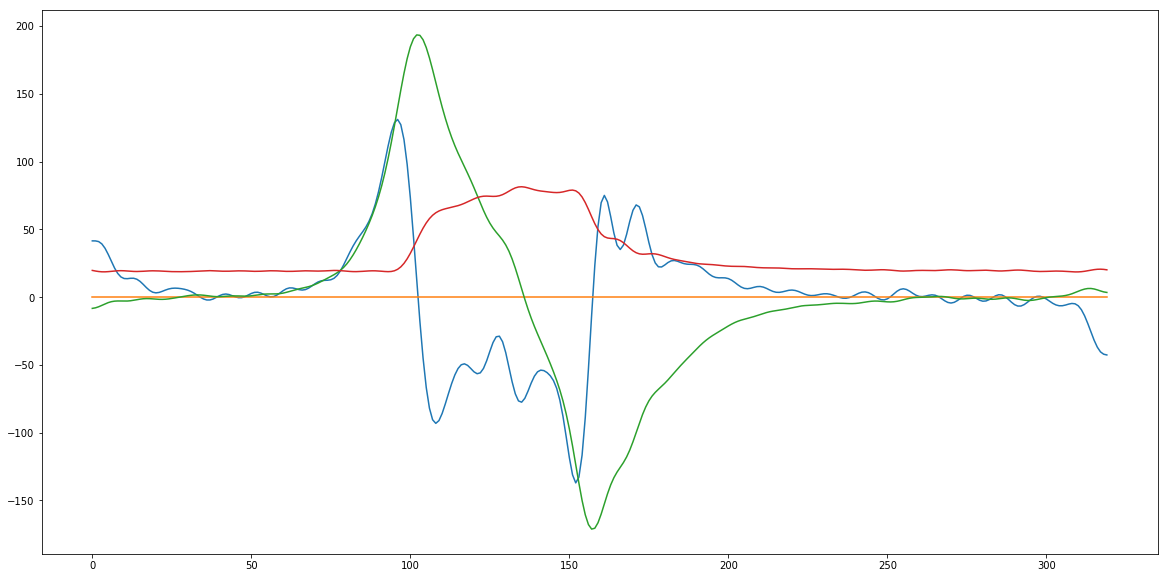

In [48]:
smooth_d2_series = sg.symiirorder1(d2_series, 10,.9)
showMe(smooth_d2_series,np.linspace(0,0,num=320), smooth_d_series, series)

In [49]:
separator = np.argmin(smooth_d2_series)
print(separator)


152


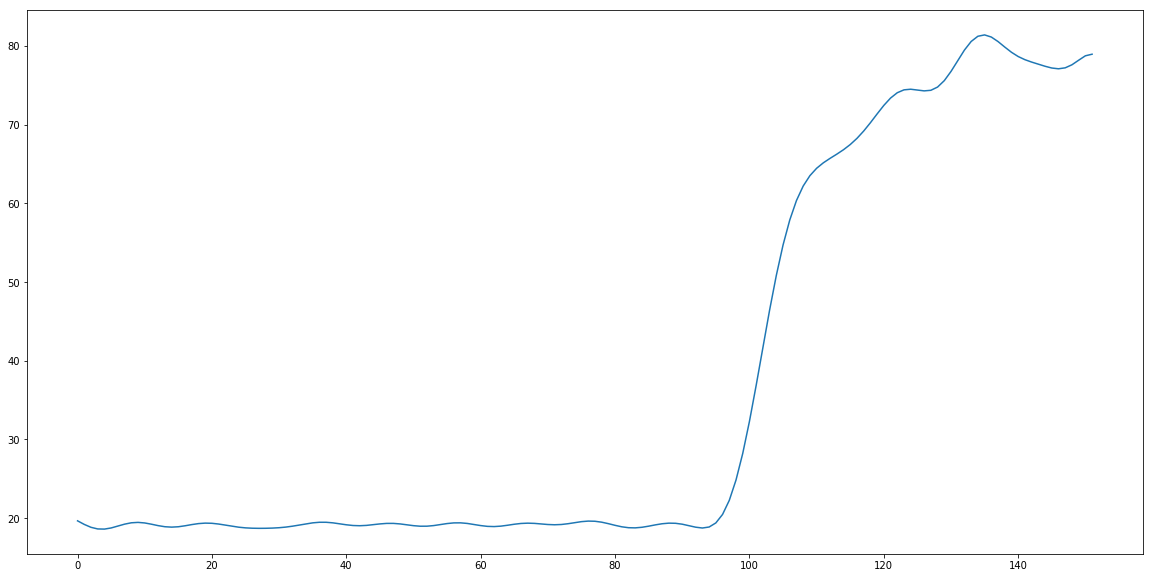

In [50]:
showMe(series[0:separator])

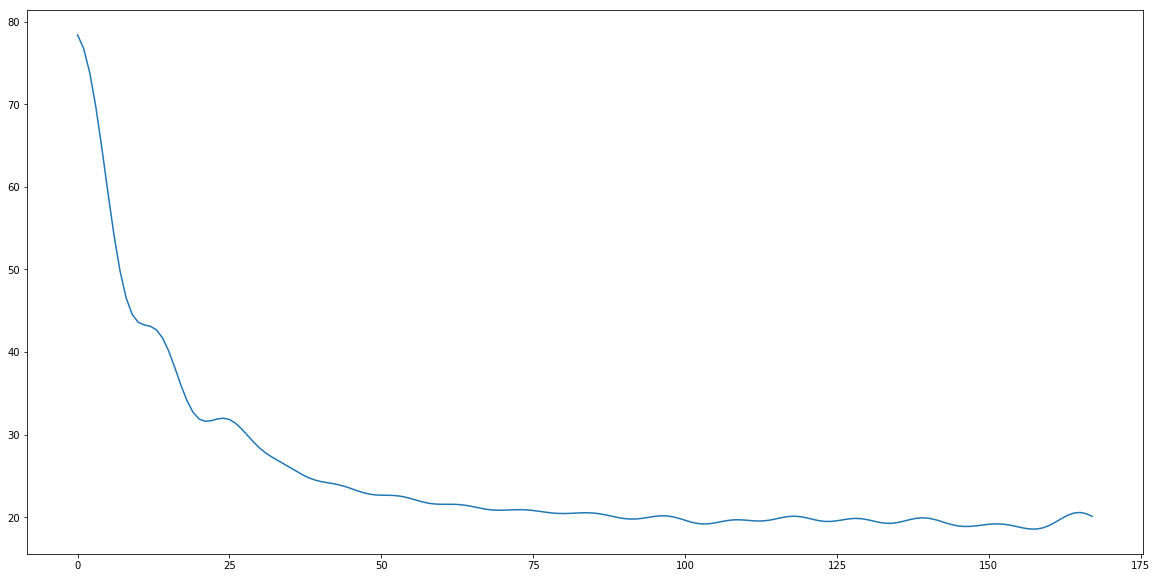

In [51]:
showMe(series[separator:])